In [10]:
import h5py
import scipy.io as io
import PIL as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
#from image import *

In [11]:
def gaussian_filter_density(gt):
    #Generates a density map using Gaussian filter transformation
    
    density = np.zeros(gt.shape, dtype=np.float32)
    
    gt_count = np.count_nonzero(gt)
    
    if gt_count == 0:
        return density

    # FInd out the K nearest neighbours using a KDTree
    
    pts = np.array(list(zip(np.nonzero(gt)[1].ravel(), np.nonzero(gt)[0].ravel())))
    leafsize = 2048
    
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    
    # query kdtree
    distances, locations = tree.query(pts, k=4)

        
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        
        #Convolve with the gaussian filter
        
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    
    return density

In [12]:
root = 'data'

In [13]:
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test,part_B_train,part_B_test]

In [14]:
# List of all image paths 

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))
print(img_paths[0:5]) 

1198
['data\\part_A_final/train_data\\images\\IMG_1.jpg', 'data\\part_A_final/train_data\\images\\IMG_10.jpg', 'data\\part_A_final/train_data\\images\\IMG_100.jpg', 'data\\part_A_final/train_data\\images\\IMG_101.jpg', 'data\\part_A_final/train_data\\images\\IMG_102.jpg']


{'__version__': '1.0', '__globals__': [], 'image_info': array([[array([[(array([[ 184.62745098,  276.34937611],
       [ 281.82531194,  273.6114082 ],
       [ 276.34937611,  244.8627451 ],
       [ 450.89483066,  365.33333333],
       [ 465.95365419,  300.30659537],
       [ 486.48841355,  274.29590018],
       [ 679.51515152,  493.33333333],
       [ 631.60071301,  702.78787879],
       [ 442.68092692,  147.66488414],
       [ 459.79322638,  128.49910873],
       [ 448.15686275,  120.96969697],
       [  47.72905526,  134.65953654],
       [  71.8573975 ,  106.42424242],
       [  21.46167558,   37.88948307],
       [ 482.55258467,   99.92156863],
       [ 579.40819964,   85.88948307],
       [ 605.76114082,   67.40819964],
       [ 656.67023173,   37.37611408],
       [ 731.79322638,   66.63814617],
       [ 771.32263815,   40.79857398],
       [ 803.83600713,   48.15686275],
       [ 991.81461676,  192.67023173],
       [1007.98573975,  146.89483066],
       [  14.71204669,   24.77

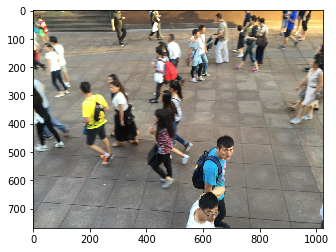

In [48]:
# test block 请不要执行
img_path ='data\\part_B_final/train_data\\images\\IMG_328.jpg'
        
    
# 加载mat标签
mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
gt = mat["image_info"][0,0][0,0][0]
# print(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
print(mat)
print(mat["image_info"][0,0][0,0][0])  # 图片对应的信息 即 人头所在位置
print(gt.shape)  # 27张人脸的坐标

# 给对应的坐标位置进行标点为1 
img= plt.imread(img_path)
img_groundtruth = np.asarray(img)
plt.imshow(img_groundtruth,cmap=CM.jet)

k = np.zeros((img.shape[0],img.shape[1]))
for i in range(0,len(gt)):
    if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
        k[int(gt[i][1]),int(gt[i][0])]=1
    

In [49]:
k = gaussian_filter_density(k)  # 对图片进行高斯滤波


[[1.8685858e-04 1.9281017e-04 1.9856916e-04 ... 1.3888932e-06
  1.3813169e-06 1.3733047e-06]
 [1.9744744e-04 2.0377856e-04 2.0990831e-04 ... 1.4629990e-06
  1.4550125e-06 1.4465670e-06]
 [2.0829021e-04 2.1501415e-04 2.2152789e-04 ... 1.5405358e-06
  1.5321198e-06 1.5232205e-06]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.8148680e-09
  9.4614467e-09 9.1198942e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.7565120e-09
  9.4051922e-09 9.0656709e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.6975912e-09
  9.3483923e-09 9.0109218e-09]]
[[1.8685858e-04 1.9281017e-04 1.9856916e-04 ... 1.3888932e-06
  1.3813169e-06 1.3733047e-06]
 [1.9744744e-04 2.0377856e-04 2.0990831e-04 ... 1.4629990e-06
  1.4550125e-06 1.4465670e-06]
 [2.0829021e-04 2.1501415e-04 2.2152789e-04 ... 1.5405358e-06
  1.5321198e-06 1.5232205e-06]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.8148680e-09
  9.4614467e-09 9.1198942e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.7565120e-

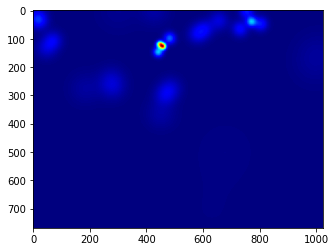

In [50]:
print(k)
groundtruth = np.asarray(k)
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))


In [ ]:
from tqdm import tqdm    
from PIL import Image

i = 0
for img_path in tqdm(img_paths[:]):
        
    
    # Load sparse matrix 加载图片对应的mat文件，内含lable
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    # gt才是 label文件 ，gt是n行两列的二维数据
    gt = mat["image_info"][0,0][0,0][0]
    
    #Read image
    img= plt.imread(img_path)
    
    # Create a zero matrix of image size
    k = np.zeros((img.shape[0],img.shape[1]))
    
    #Generate hot encoded matrix of sparse matrix
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    
    # generate density map
    k = gaussian_filter_density(k)
    image=Image.fromarray(255*k)
    image.show()
    
    # File path to save density map
    file_path = img_path.replace('.jpg','.h5').replace('images','ground')
    
    
    with h5py.File(file_path, 'w') as hf:
            hf['density'] = k
    




  0%|          | 0/1198 [00:00<?, ?it/s]

  0%|          | 1/1198 [00:33<11:16:26, 33.91s/it]

In [103]:
path_test = "G:/pycharm/CSRnet-master/data/part_A_final/train_data/ground/IMG_107.h5"

# file_path = img_paths[-5].replace('.jpg','.h5').replace('images','ground')

file_path = path_test
print(file_path)


G:/pycharm/CSRnet-master/data/part_A_final/train_data/ground/IMG_107.h5


Sum =  119.05791


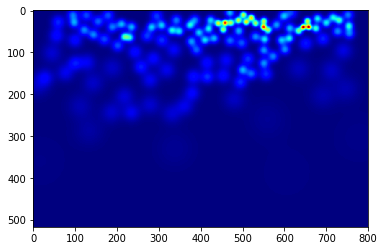

In [104]:
#Sample Ground Truth
gt_file = h5py.File(file_path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))

G:/pycharm/CSRnet-master/data/part_A_final/train_data/images/IMG_107.jpg


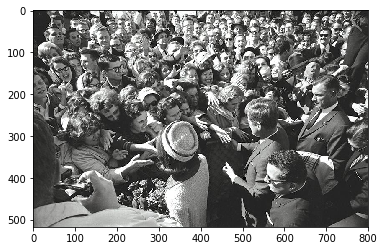

In [105]:
# Image corresponding to the ground truth
img = Image.open(file_path.replace('.h5','.jpg').replace('ground','images')).convert('RGBA')
plt.imshow(img)
print(file_path.replace('.h5','.jpg').replace('ground','images'))